In [1]:
import os
import pandas as pd
import seaborn as sns
import itertools

## Fig 1. Question Types

In [2]:
question_dir = "../../test_queries/subsets/"
question_files = os.listdir(question_dir)
question_files

['allele_def_subset.txt',
 'recommendation_category_for_pheno_subset.txt',
 'allele_function_subset.txt',
 'drug_guidelines_for_pheno_subset.txt',
 'diplotype_to_phenotype_subset.txt',
 'allele_freq_subset.txt',
 'refusal_subset.txt',
 'drug_to_genes_subset.txt',
 'gene_to_drugs_subset.txt']

In [3]:
question_counts = {}
for question_path in question_files:
    question_class = " ".join(question_path.split("_")[:-1])
    question_counts[question_class] = len(open(question_dir+question_path, "r").readlines()) - 1

question_counts

{'allele def': 84,
 'recommendation category for pheno': 522,
 'allele function': 153,
 'drug guidelines for pheno': 411,
 'diplotype to phenotype': 191,
 'allele freq': 544,
 'refusal': 136,
 'drug to genes': 158,
 'gene to drugs': 22}

## Fig 2. Bar chart of scores by LLM and task

In [5]:
# dfs is a dictionary in the form of {llm_name: results_df, ...}, metric_names is a list of scoring metrics to be plotted
def barplot_metrics(dfs, metric_names): 
    metric_dfs = [dfs[llm_name][metric_names] for llm_name in sorted(dfs.keys())]
    combined = pd.concat(metric_dfs, keys=sorted(dfs.keys()))
    combined = combined.reset_index().melt(id_vars=["level_0"], value_vars=metric_names)
    combined.columns = ["LLM", "Metric", "Value"]
    return sns.catplot(combined, kind="bar", x="Metric", y="Value", hue="LLM")

### Allele Definition

gpt-4-turbo
Mean precision: 0.2599206349206349
Mean recall: 0.2220589842362648
gpt-3.5-turbo
Mean precision: 0.17500000000000002
Mean recall: 0.2106944785946507
gpt-4o
Mean precision: 0.25992063492063494
Mean recall: 0.22290932437231922
gemini-pro
Mean precision: 0.13412698412698412
Mean recall: 0.14224209764226975


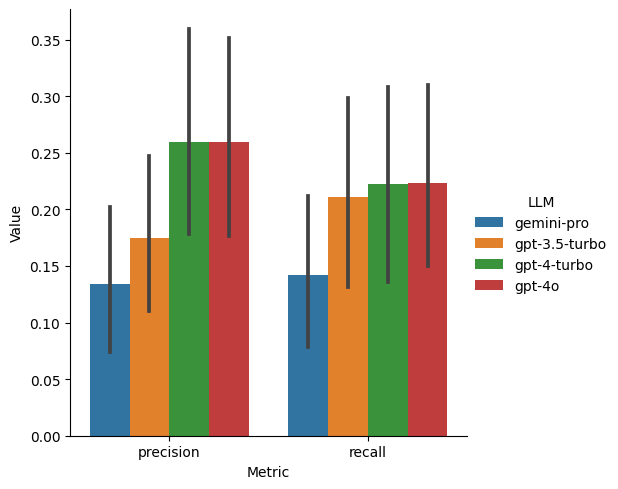

In [6]:
allele_def_gpt4 = pd.read_csv("../../results/AlleleDefinition_gpt-4-turbo_results.txt", sep="\t", header=0)
allele_def_gpt3_5 = pd.read_csv("../../results/AlleleDefinition_gpt-3.5-turbo_results.txt", sep="\t", header=0)
allele_def_gpt4o = pd.read_csv("../../results/AlleleDefinition_gpt-4o_results.txt", sep="\t", header=0)
allele_def_gemini_pro = pd.read_csv("../../results/AlleleDefinition_gemini-pro_results.txt", sep="\t", header=0)

print("gpt-4-turbo")
print(f"Mean precision: {allele_def_gpt4['precision'].mean()}")
print(f"Mean recall: {allele_def_gpt4['recall'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean precision: {allele_def_gpt3_5['precision'].mean()}")
print(f"Mean recall: {allele_def_gpt3_5['recall'].mean()}")

print("gpt-4o")
print(f"Mean precision: {allele_def_gpt4o['precision'].mean()}")
print(f"Mean recall: {allele_def_gpt4o['recall'].mean()}")

print("gemini-pro")
print(f"Mean precision: {allele_def_gemini_pro['precision'].mean()}")
print(f"Mean recall: {allele_def_gemini_pro['recall'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": allele_def_gpt4, 
        "gpt-3.5-turbo": allele_def_gpt3_5,
        "gpt-4o": allele_def_gpt4o,
        "gemini-pro": allele_def_gemini_pro
    }, 
    metric_names=["precision", "recall"]
)

### Allele Frequency

gpt-4-turbo
Mean absolute deviation: 0.06010459558823527
gpt-3.5-turbo
Mean absolute deviation: 0.11468216911764705
gpt-4o
Mean absolute deviation: 0.0561066176470588
gemini-pro
Mean absolute deviation: 0.1464623161764706


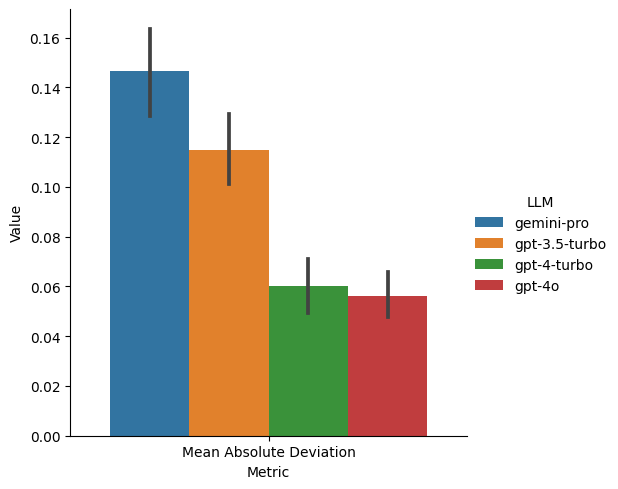

In [7]:
allele_freq_gpt4 = pd.read_csv("../../results/AlleleFrequency_gpt-4-turbo_results.txt", sep="\t", header=0)
allele_freq_gpt3_5 = pd.read_csv("../../results/AlleleFrequency_gpt-3.5-turbo_results.txt", sep="\t", header=0)
allele_freq_gpt4o = pd.read_csv("../../results/AlleleFrequency_gpt-4o_results.txt", sep="\t", header=0)
allele_freq_gemini_pro = pd.read_csv("../../results/AlleleFrequency_gemini-pro_results.txt", sep="\t", header=0)

print("gpt-4-turbo")
print(f"Mean absolute deviation: {allele_freq_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean absolute deviation: {allele_freq_gpt3_5['score'].mean()}")

print("gpt-4o")
print(f"Mean absolute deviation: {allele_freq_gpt4o['score'].mean()}")

print("gemini-pro")
print(f"Mean absolute deviation: {allele_freq_gemini_pro['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": allele_freq_gpt4, 
        "gpt-3.5-turbo": allele_freq_gpt3_5,
        "gpt-4o": allele_freq_gpt4o,
        "gemini-pro": allele_freq_gemini_pro
    }, 
    metric_names=["score"]
).set_xticklabels(["Mean Absolute Deviation"])

### Allele Function

gpt-4-turbo
Accuracy: 0.5032679738562091
gpt-3.5-turbo
Accuracy: 0.3333333333333333
gpt-4o
Accuracy: 0.477124183006536
gemini-pro
Accuracy: 0.3790849673202614


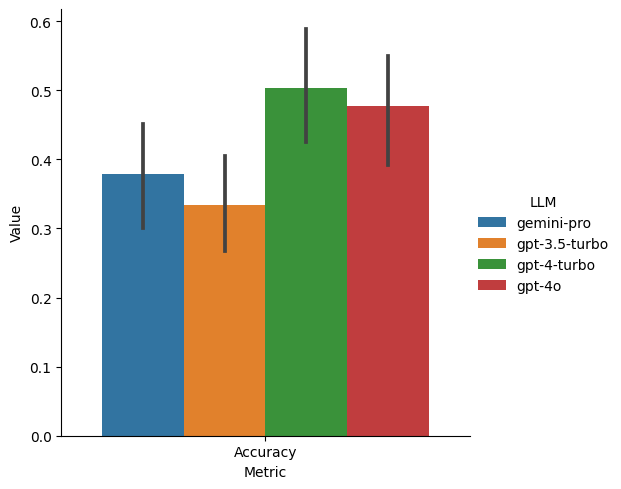

In [8]:
allele_func_gpt4 = pd.read_csv("../../results/AlleleFunction_gpt-4-turbo_results.txt", sep="\t", header=0)
allele_func_gpt3_5 = pd.read_csv("../../results/AlleleFunction_gpt-3.5-turbo_results.txt", sep="\t", header=0)
allele_func_gpt4o = pd.read_csv("../../results/AlleleFunction_gpt-4o_results.txt", sep="\t", header=0)
allele_func_gemini_pro = pd.read_csv("../../results/AlleleFunction_gemini-pro_results.txt", sep="\t", header=0)

print("gpt-4-turbo")
print(f"Accuracy: {allele_func_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Accuracy: {allele_func_gpt3_5['score'].mean()}")

print("gpt-4o")
print(f"Accuracy: {allele_func_gpt4o['score'].mean()}")

print("gemini-pro")
print(f"Accuracy: {allele_func_gemini_pro['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": allele_func_gpt4, 
        "gpt-3.5-turbo": allele_func_gpt3_5,
        "gpt-4o": allele_func_gpt4o,
        "gemini-pro": allele_func_gemini_pro
    }, 
    metric_names=["score"]
).set_xticklabels(["Accuracy"])

### Diplotype to Phenotype

gpt-4-turbo
Accuracy: 0.36649214659685864
gpt-3.5-turbo
Accuracy: 0.25654450261780104
gpt-4o
Accuracy: 0.43455497382198954
gemini-pro
Accuracy: 0.34554973821989526


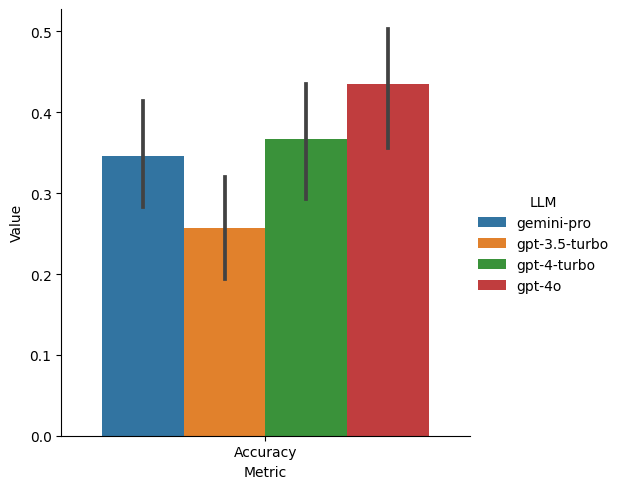

In [10]:
diplotype_gpt4 = pd.read_csv("../../results/DiplotypeToPhenotype_gpt-4-turbo_results.txt", sep="\t", header=0)
diplotype_gpt3_5 = pd.read_csv("../../results/DiplotypeToPhenotype_gpt-3.5-turbo_results.txt", sep="\t", header=0)
diplotype_gpt4o = pd.read_csv("../../results/DiplotypeToPhenotype_gpt-4o_results.txt", sep="\t", header=0)
diplotype_gemini_pro = pd.read_csv("../../results/DiplotypeToPhenotype_gemini-pro_results.txt", sep="\t", header=0)

print("gpt-4-turbo")
print(f"Accuracy: {diplotype_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Accuracy: {diplotype_gpt3_5['score'].mean()}")

print("gpt-4o")
print(f"Accuracy: {diplotype_gpt4o['score'].mean()}")

print("gemini-pro")
print(f"Accuracy: {diplotype_gemini_pro['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": diplotype_gpt4, 
        "gpt-3.5-turbo": diplotype_gpt3_5,
        "gpt-4o": diplotype_gpt4o,
        "gemini-pro": diplotype_gemini_pro
    }, 
    metric_names=["score"]
).set_xticklabels(["Accuracy"])

### Drug to Genes

gpt-4-turbo
Mean precision: 0.500210970464135
Mean recall: 0.7573839662447257
gpt-3.5-turbo
Mean precision: 0.25682976921109824
Mean recall: 0.7215189873417721
gpt-4o
Mean precision: 0.7041139240506329
Mean recall: 0.8892405063291139
gemini-pro
Mean precision: 0.25677904901006166
Mean recall: 0.48417721518987344


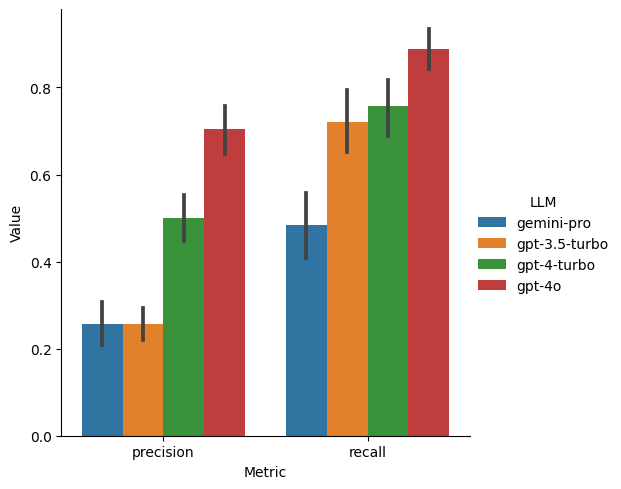

In [11]:
d2g_def_gpt4 = pd.read_csv("../../results/DrugToGenes_gpt-4-turbo_results.txt", sep="\t", header=0)
d2g_def_gpt3_5 = pd.read_csv("../../results/DrugToGenes_gpt-3.5-turbo_results.txt", sep="\t", header=0)
d2g_def_gpt4o = pd.read_csv("../../results/DrugToGenes_gpt-4o_results.txt", sep="\t", header=0)
d2g_def_gemini_pro = pd.read_csv("../../results/DrugToGenes_gemini-pro_results.txt", sep="\t", header=0)


print("gpt-4-turbo")
print(f"Mean precision: {d2g_def_gpt4['precision'].mean()}")
print(f"Mean recall: {d2g_def_gpt4['recall'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean precision: {d2g_def_gpt3_5['precision'].mean()}")
print(f"Mean recall: {d2g_def_gpt3_5['recall'].mean()}")

print("gpt-4o")
print(f"Mean precision: {d2g_def_gpt4o['precision'].mean()}")
print(f"Mean recall: {d2g_def_gpt4o['recall'].mean()}")

print("gemini-pro")
print(f"Mean precision: {d2g_def_gemini_pro['precision'].mean()}")
print(f"Mean recall: {d2g_def_gemini_pro['recall'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4o": d2g_def_gpt4o,
        "gpt-4-turbo": d2g_def_gpt4, 
        "gpt-3.5-turbo": d2g_def_gpt3_5,
        "gemini-pro": d2g_def_gemini_pro
    }, 
    metric_names=["precision", "recall"]
)

### Gene to Drugs

gpt-4o
Mean precision: 0.6842674868990658
Mean recall: 0.6300259084349993
gpt-4-turbo
Mean precision: 0.47595657031140903
Mean recall: 0.6719303423848878
gpt-3.5-turbo
Mean precision: 0.5459366391184572
Mean recall: 0.6809982946346582
gemini-pro
Mean precision: 0.13636363636363635
Mean recall: 0.11038961038961038


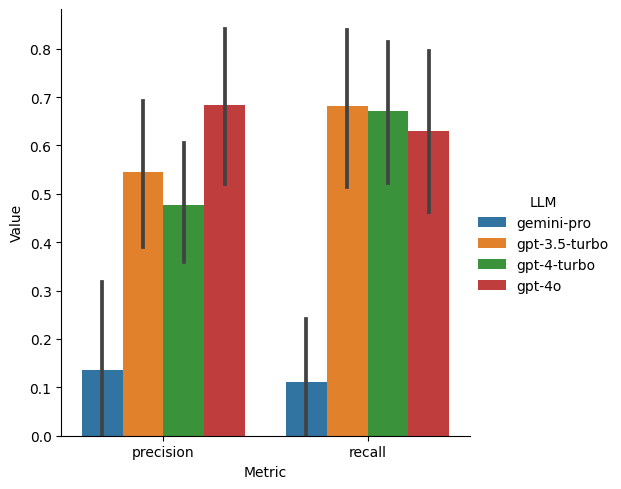

In [12]:
g2d_def_gpt4o = pd.read_csv("../../results/GeneToDrugs_gpt-4o_results.txt", sep="\t", header=0)
g2d_def_gpt4 = pd.read_csv("../../results/GeneToDrugs_gpt-4-turbo_results.txt", sep="\t", header=0)
g2d_def_gpt3_5 = pd.read_csv("../../results/GeneToDrugs_gpt-3.5-turbo_results.txt", sep="\t", header=0)
g2d_def_gemini_pro = pd.read_csv("../../results/GeneToDrugs_gemini-pro_results.txt", sep="\t", header=0)

print("gpt-4o")
print(f"Mean precision: {g2d_def_gpt4o['precision'].mean()}")
print(f"Mean recall: {g2d_def_gpt4o['recall'].mean()}")


print("gpt-4-turbo")
print(f"Mean precision: {g2d_def_gpt4['precision'].mean()}")
print(f"Mean recall: {g2d_def_gpt4['recall'].mean()}")

print("gpt-3.5-turbo")
print(f"Mean precision: {g2d_def_gpt3_5['precision'].mean()}")
print(f"Mean recall: {g2d_def_gpt3_5['recall'].mean()}")

print("gemini-pro")
print(f"Mean precision: {g2d_def_gemini_pro['precision'].mean()}")
print(f"Mean recall: {g2d_def_gemini_pro['recall'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4o": g2d_def_gpt4o,
        "gpt-4-turbo": g2d_def_gpt4, 
        "gpt-3.5-turbo": g2d_def_gpt3_5,
        "gemini-pro": g2d_def_gemini_pro
    }, 
    metric_names=["precision", "recall"]
)

### Phenotype to Guideline (Short Answer)

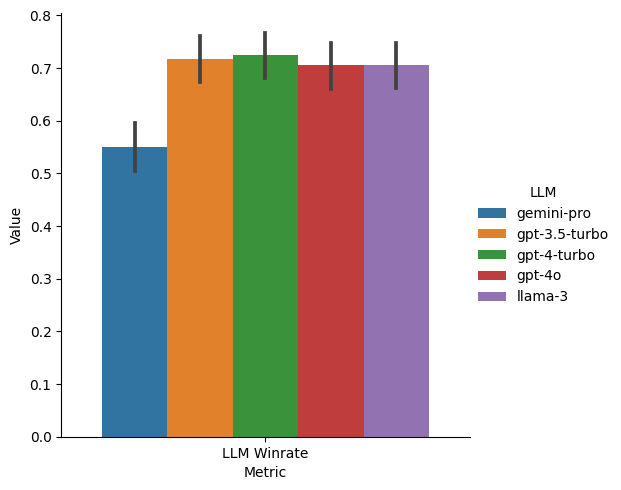

In [23]:
pheno2guide_gpt4o = pd.read_csv("../../results/PhenoToGuideline_gpt-4o_results.txt", sep="\t", header=0)
pheno2guide_gpt4 = pd.read_csv("../../results/PhenoToGuideline_gpt-4-turbo_results.txt", sep="\t", header=0)
pheno2guide_gpt3_5 = pd.read_csv("../../results/PhenoToGuideline_gpt-3.5-turbo_results.txt", sep="\t", header=0)
pheno2guide_gemini_pro = pd.read_csv("../../results/PhenoToGuideline_gemini-pro_results.txt", sep="\t", header=0)
pheno2guide_llama_3 = pd.read_csv("../../results/PhenoToGuideline_Meta-Llama-3-70B-Instruct_results.txt", sep="\t", header=0)

p2g_results = [pheno2guide_gpt4o, pheno2guide_gpt4, pheno2guide_gpt3_5, pheno2guide_gemini_pro, pheno2guide_llama_3]

for result in p2g_results:
    result["LLM Winrate"] = result.apply(lambda x: x["bert_score_precision_llm_vs_ref"] > x["bert_score_precision_llm_vs_discordant"], axis=1)

metrics = ["LLM Winrate"]
barplot_metrics(
    dfs={
        "gpt-4o": pheno2guide_gpt4o,
        "gpt-4-turbo": pheno2guide_gpt4, 
        "gpt-3.5-turbo": pheno2guide_gpt3_5,
        "gemini-pro": pheno2guide_gemini_pro,
        "llama-3": pheno2guide_llama_3
    }, 
    metric_names=metrics
)

### Phenotype to Guideline Category

gpt-4-turbo
Accuracy: 0.43846153846153846
gpt-3.5-turbo
Accuracy: 0.3211538461538462
gpt-4o
Accuracy: 0.5634615384615385
gemini-pro
Accuracy: 0.35384615384615387


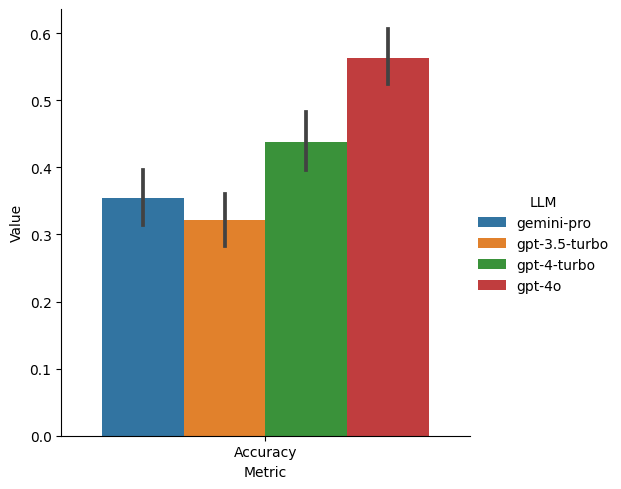

In [17]:
pheno2cat_gpt4 = pd.read_csv("../../results/PhenoToCategory_gpt-4-turbo_results.txt", sep="\t", header=0)
pheno2cat_gpt3_5 = pd.read_csv("../../results/PhenoToCategory_gpt-3.5-turbo_results.txt", sep="\t", header=0)
pheno2cat_gpt4o = pd.read_csv("../../results/PhenoToCategory_gpt-4o_results.txt", sep="\t", header=0)
pheno2cat_gemini_pro = pd.read_csv("../../results/PhenoToCategory_gemini-pro_results.txt", sep="\t", header=0)

print("gpt-4-turbo")
print(f"Accuracy: {pheno2cat_gpt4['score'].mean()}")

print("gpt-3.5-turbo")
print(f"Accuracy: {pheno2cat_gpt3_5['score'].mean()}")

print("gpt-4o")
print(f"Accuracy: {pheno2cat_gpt4o['score'].mean()}")

print("gemini-pro")
print(f"Accuracy: {pheno2cat_gemini_pro['score'].mean()}")

barplot_metrics(
    dfs={
        "gpt-4-turbo": pheno2cat_gpt4, 
        "gpt-3.5-turbo": pheno2cat_gpt3_5,
        "gpt-4o": pheno2cat_gpt4o, 
        "gemini-pro": pheno2cat_gemini_pro
    }, 
    metric_names=["score"]
).set_xticklabels(["Accuracy"])

### Adversarial

## Table 1. LLM performance by question category

## Table 2. Representative Examples